In [1]:
##Flight Price Prediction(EDA + Feature Engineering)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train_df=pd.read_excel(r"C:\Users\PushpitJain\Downloads\Data_train.xlsx")

In [4]:
train_df.head(20)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [5]:
test_df=pd.read_excel(r"C:\Users\PushpitJain\Downloads\Test_set.xlsx")

In [6]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [8]:
final_df= train_df.append(test_df)
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [9]:
final_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [10]:
final_df['Date']=final_df['Date_of_Journey'].str.split('/').str[0]
final_df['Month']=final_df['Date_of_Journey'].str.split('/').str[1]
final_df['Year']=final_df['Date_of_Journey'].str.split('/').str[2]

In [11]:
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [12]:
final_df['Date']=final_df['Date'].astype(int)
final_df['Month']=final_df['Month'].astype(int)
final_df['Year']=final_df['Year'].astype(int)

In [13]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int32  
 12  Month            13354 non-null  int32  
 13  Year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(10)
memory usage: 1.4+ MB


In [14]:
final_df.drop('Date_of_Journey',axis=1,inplace=True)

In [15]:
final_df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019


In [16]:
final_df['Arrival_Time']=final_df['Arrival_Time'].str.split(' ').str[0]

In [17]:
#Alternate method
final_df['Arrival_Time'].apply(lambda x : x.split(' ')[0])

0       01:10
1       13:15
2       04:25
3       23:30
4       21:35
        ...  
2666    20:25
2667    16:55
2668    04:25
2669    19:15
2670    19:15
Name: Arrival_Time, Length: 13354, dtype: object

In [18]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [19]:
final_df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
dtype: int64

In [20]:
final_df['Arrival_hour']=final_df['Arrival_Time'].apply(lambda x : x.split(':')[0])
final_df['Arrival_min']=final_df['Arrival_Time'].apply(lambda x : x.split(':')[1])

In [21]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35


In [22]:
final_df['Arrival_hour']=final_df['Arrival_hour'].astype(int)
final_df['Arrival_min']=final_df['Arrival_min'].astype(int)

In [23]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int32  
 11  Month            13354 non-null  int32  
 12  Year             13354 non-null  int32  
 13  Arrival_hour     13354 non-null  int32  
 14  Arrival_min      13354 non-null  int32  
dtypes: float64(1), int32(5), object(9)
memory usage: 1.4+ MB


In [24]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35


In [25]:
final_df.drop('Arrival_Time',axis=1,inplace=True)

In [26]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35


In [27]:
final_df['Departure_hour']=final_df['Dep_Time'].apply(lambda x : x.split(':')[0])
final_df['Departure_min']=final_df['Dep_Time'].apply(lambda x : x.split(':')[1])

In [28]:
final_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20


In [29]:
final_df['Departure_hour']=final_df['Departure_hour'].astype(int)
final_df['Departure_min']=final_df['Departure_min'].astype(int)

In [30]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50


In [31]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Duration         13354 non-null  object 
 6   Total_Stops      13353 non-null  object 
 7   Additional_Info  13354 non-null  object 
 8   Price            10683 non-null  float64
 9   Date             13354 non-null  int32  
 10  Month            13354 non-null  int32  
 11  Year             13354 non-null  int32  
 12  Arrival_hour     13354 non-null  int32  
 13  Arrival_min      13354 non-null  int32  
 14  Departure_hour   13354 non-null  int32  
 15  Departure_min    13354 non-null  int32  
dtypes: float64(1), int32(7), object(8)
memory usage: 1.4+ MB


In [32]:
final_df.drop('Dep_Time',axis=1,inplace=True)

In [33]:
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50


In [34]:
final_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [35]:
final_df['Total_Stops']=final_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':2})

In [36]:
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [37]:
final_df.drop('Route',axis=1,inplace=True)

In [38]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [39]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Duration         13354 non-null  object 
 4   Total_Stops      13353 non-null  float64
 5   Additional_Info  13354 non-null  object 
 6   Price            10683 non-null  float64
 7   Date             13354 non-null  int32  
 8   Month            13354 non-null  int32  
 9   Year             13354 non-null  int32  
 10  Arrival_hour     13354 non-null  int32  
 11  Arrival_min      13354 non-null  int32  
 12  Departure_hour   13354 non-null  int32  
 13  Departure_min    13354 non-null  int32  
dtypes: float64(2), int32(7), object(5)
memory usage: 1.2+ MB


In [40]:
final_df['duration_hour']=final_df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [ ]:
final_df[final_df['Duration']=='5m']

In [42]:
final_df.drop(6474,axis=0,inplace=True)
final_df.drop(2660,axis=0,inplace=True)

In [43]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min,duration_hour
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,4


In [44]:
final_df['duration_hour']=final_df['duration_hour'].astype(int)

In [45]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  object 
 1   Source           13351 non-null  object 
 2   Destination      13351 non-null  object 
 3   Duration         13351 non-null  object 
 4   Total_Stops      13350 non-null  float64
 5   Additional_Info  13351 non-null  object 
 6   Price            10681 non-null  float64
 7   Date             13351 non-null  int32  
 8   Month            13351 non-null  int32  
 9   Year             13351 non-null  int32  
 10  Arrival_hour     13351 non-null  int32  
 11  Arrival_min      13351 non-null  int32  
 12  Departure_hour   13351 non-null  int32  
 13  Departure_min    13351 non-null  int32  
 14  duration_hour    13351 non-null  int32  
dtypes: float64(2), int32(8), object(5)
memory usage: 1.2+ MB


In [46]:
final_df['duration_min']=final_df['duration_hour']*60

In [47]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2,120
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7,420
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,19,1140
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,5,300
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,4,240


In [48]:
final_df['duration_m']=final_df['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [49]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min,duration_hour,duration_min,duration_m
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2,120,50
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7,420,25
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,19,1140,NaN
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,5,300,25
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,4,240,45


In [50]:
final_df['duration_m'].fillna(0,inplace=True)

In [51]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min,duration_hour,duration_min,duration_m
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2,120,50
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7,420,25
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,19,1140,0
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,5,300,25
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,4,240,45


In [52]:
final_df['duration_m']=final_df['duration_m'].astype(int)

In [53]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  object 
 1   Source           13351 non-null  object 
 2   Destination      13351 non-null  object 
 3   Duration         13351 non-null  object 
 4   Total_Stops      13350 non-null  float64
 5   Additional_Info  13351 non-null  object 
 6   Price            10681 non-null  float64
 7   Date             13351 non-null  int32  
 8   Month            13351 non-null  int32  
 9   Year             13351 non-null  int32  
 10  Arrival_hour     13351 non-null  int32  
 11  Arrival_min      13351 non-null  int32  
 12  Departure_hour   13351 non-null  int32  
 13  Departure_min    13351 non-null  int32  
 14  duration_hour    13351 non-null  int32  
 15  duration_min     13351 non-null  int32  
 16  duration_m       13351 non-null  int32  
dtypes: float64(2)

In [54]:
final_df['duration_totalmin']=final_df['duration_min']+final_df['duration_m']

In [55]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min,duration_hour,duration_min,duration_m,duration_totalmin
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2,120,50,170
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7,420,25,445
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,19,1140,0,1140
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,5,300,25,325
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,4,240,45,285


In [56]:
final_df.drop('duration_min',axis=1,inplace=True)

In [57]:
final_df.drop('Duration',axis=1,inplace=True)

In [58]:
final_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min,duration_hour,duration_m,duration_totalmin
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.0,24,3,2019,1,10,22,20,2,50,170
1,Air India,Kolkata,Banglore,2.0,No info,7662.0,1,5,2019,13,15,5,50,7,25,445
2,Jet Airways,Delhi,Cochin,2.0,No info,13882.0,9,6,2019,4,25,9,25,19,0,1140
3,IndiGo,Kolkata,Banglore,1.0,No info,6218.0,12,5,2019,23,30,18,5,5,25,325
4,IndiGo,Banglore,New Delhi,1.0,No info,13302.0,1,3,2019,21,35,16,50,4,45,285


In [59]:
##Handling Categorical Data
final_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [60]:
##label encoding
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [61]:
final_df['Airline']=labelencoder.fit_transform(final_df['Airline'])
final_df['Source']=labelencoder.fit_transform(final_df['Source'])
final_df['Destination']=labelencoder.fit_transform(final_df['Destination'])
final_df['Additional_Info']=labelencoder.fit_transform(final_df['Additional_Info'])


In [62]:
final_df.shape

(13351, 16)

In [63]:
final_df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min,duration_hour,duration_m,duration_totalmin
0,3,0,5,0.0,8,3897.0,24,3,2019,1,10,22,20,2,50,170
1,1,3,0,2.0,8,7662.0,1,5,2019,13,15,5,50,7,25,445


In [64]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            13351 non-null  int32  
 1   Source             13351 non-null  int32  
 2   Destination        13351 non-null  int32  
 3   Total_Stops        13350 non-null  float64
 4   Additional_Info    13351 non-null  int32  
 5   Price              10681 non-null  float64
 6   Date               13351 non-null  int32  
 7   Month              13351 non-null  int32  
 8   Year               13351 non-null  int32  
 9   Arrival_hour       13351 non-null  int32  
 10  Arrival_min        13351 non-null  int32  
 11  Departure_hour     13351 non-null  int32  
 12  Departure_min      13351 non-null  int32  
 13  duration_hour      13351 non-null  int32  
 14  duration_m         13351 non-null  int32  
 15  duration_totalmin  13351 non-null  int32  
dtypes: float64(2), int32(14

In [65]:
df1=pd.get_dummies(final_df['Airline'])

In [66]:
df2=pd.get_dummies(final_df['Source'])
df3=pd.get_dummies(final_df['Destination'])
df4=pd.get_dummies(final_df['Additional_Info'])

In [67]:
final_df=pd.get_dummies(final_df,columns=['Airline','Source','Destination','Additional_Info'],drop_first=True)

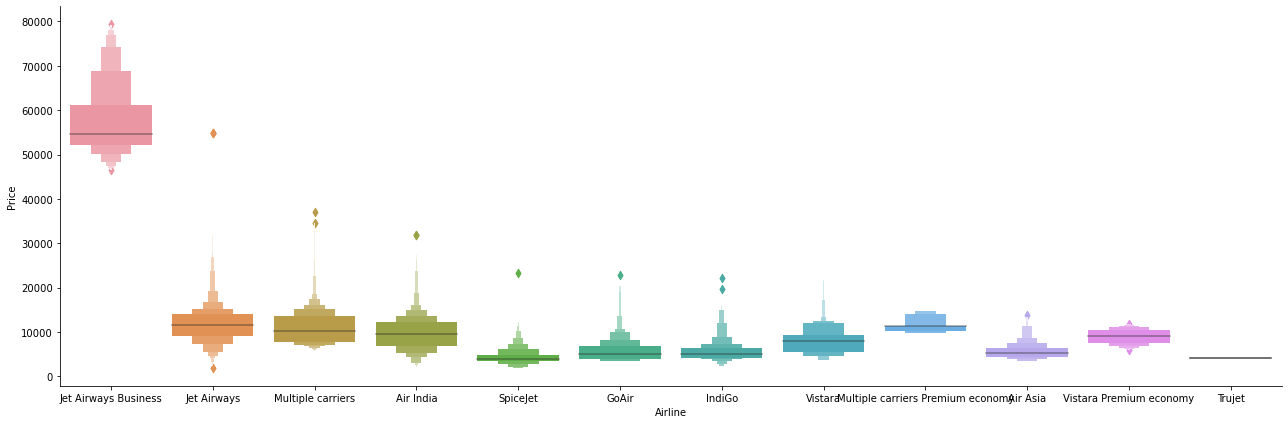

In [68]:
sns.catplot(y="Price",x="Airline",data=train_df.sort_values("Price",ascending=False),kind="boxen", height=6,aspect=3)

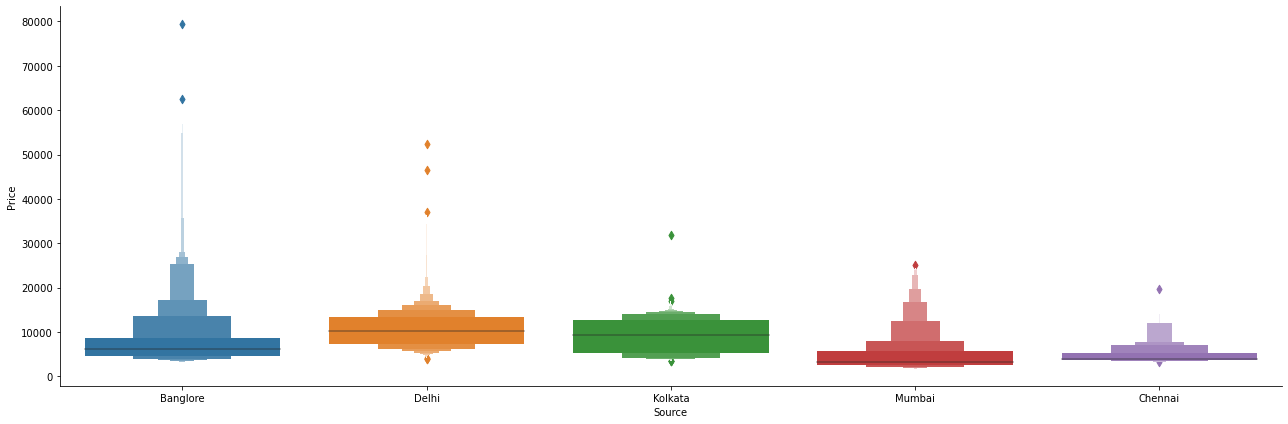

In [69]:
sns.catplot(y="Price",x="Source",data=train_df.sort_values("Price",ascending=False),kind="boxen", height=6,aspect=3)

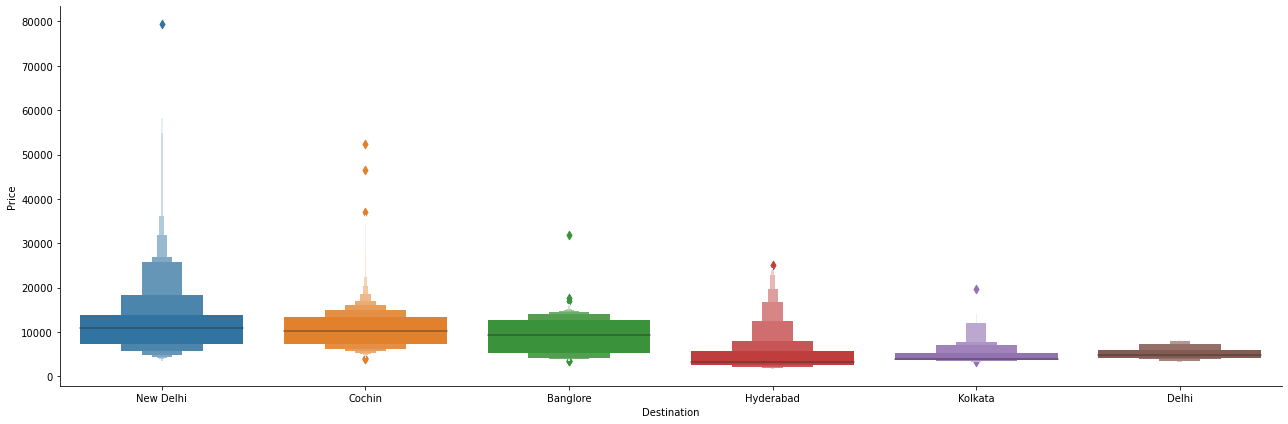

In [70]:
sns.catplot(y="Price",x="Destination",data=train_df.sort_values("Price",ascending=False),kind="boxen", height=6,aspect=3)

# In real world scenario we do not merge test data and train data to perform feature engineering as it can lead to major problem of data leakage.

In [71]:
## splitting train and test dataset

In [72]:
finaldf_test=final_df[final_df['Price'].isnull()]

In [73]:
final_df.shape

(13351, 41)

In [74]:
finaldf_train=final_df[~final_df['Price'].isnull()]

In [75]:
finaldf_train.columns

Index(['Total_Stops', 'Price', 'Date', 'Month', 'Year', 'Arrival_hour',
       'Arrival_min', 'Departure_hour', 'Departure_min', 'duration_hour',
       'duration_m', 'duration_totalmin', 'Airline_1', 'Airline_2',
       'Airline_3', 'Airline_4', 'Airline_5', 'Airline_6', 'Airline_7',
       'Airline_8', 'Airline_9', 'Airline_10', 'Airline_11', 'Source_1',
       'Source_2', 'Source_3', 'Source_4', 'Destination_1', 'Destination_2',
       'Destination_3', 'Destination_4', 'Destination_5', 'Additional_Info_1',
       'Additional_Info_2', 'Additional_Info_3', 'Additional_Info_4',
       'Additional_Info_5', 'Additional_Info_6', 'Additional_Info_7',
       'Additional_Info_8', 'Additional_Info_9'],
      dtype='object')

In [76]:
finaldf_train.shape

(10681, 41)

In [110]:
finaldf_train=finaldf_train.dropna()

In [111]:
X=finaldf_train.loc[:,['Total_Stops', 'Date', 'Month', 'Year', 'Arrival_hour',
       'Arrival_min', 'Departure_hour', 'Departure_min', 'duration_hour',
       'duration_m', 'duration_totalmin', 'Airline_1', 'Airline_2',
       'Airline_3', 'Airline_4', 'Airline_5', 'Airline_6', 'Airline_7',
       'Airline_8', 'Airline_9', 'Airline_10', 'Airline_11', 'Source_1',
       'Source_2', 'Source_3', 'Source_4', 'Destination_1', 'Destination_2',
       'Destination_3', 'Destination_4', 'Destination_5', 'Additional_Info_1',
       'Additional_Info_2', 'Additional_Info_3', 'Additional_Info_4',
       'Additional_Info_5', 'Additional_Info_6', 'Additional_Info_7',
       'Additional_Info_8', 'Additional_Info_9']]
X.head()

,Total_Stops,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min,duration_hour,duration_m,...,Destination_5,Additional_Info_1,Additional_Info_2,Additional_Info_3,Additional_Info_4,Additional_Info_5,Additional_Info_6,Additional_Info_7,Additional_Info_8,Additional_Info_9
0,0.0,24,3,2019,1,10,22,20,2,50,...,1,0,0,0,0,0,0,0,1,0
1,2.0,1,5,2019,13,15,5,50,7,25,...,0,0,0,0,0,0,0,0,1,0
2,2.0,9,6,2019,4,25,9,25,19,0,...,0,0,0,0,0,0,0,0,1,0
3,1.0,12,5,2019,23,30,18,5,5,25,...,0,0,0,0,0,0,0,0,1,0
4,1.0,1,3,2019,21,35,16,50,4,45,...,1,0,0,0,0,0,0,0,1,0


In [112]:
y=finaldf_train['Price']
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

In [113]:
X=X.dropna()

In [114]:
X.isnull().sum()

Total_Stops          0
Date                 0
Month                0
Year                 0
Arrival_hour         0
Arrival_min          0
Departure_hour       0
Departure_min        0
duration_hour        0
duration_m           0
duration_totalmin    0
Airline_1            0
Airline_2            0
Airline_3            0
Airline_4            0
Airline_5            0
Airline_6            0
Airline_7            0
Airline_8            0
Airline_9            0
Airline_10           0
Airline_11           0
Source_1             0
Source_2             0
Source_3             0
Source_4             0
Destination_1        0
Destination_2        0
Destination_3        0
Destination_4        0
Destination_5        0
Additional_Info_1    0
Additional_Info_2    0
Additional_Info_3    0
Additional_Info_4    0
Additional_Info_5    0
Additional_Info_6    0
Additional_Info_7    0
Additional_Info_8    0
Additional_Info_9    0
dtype: int64

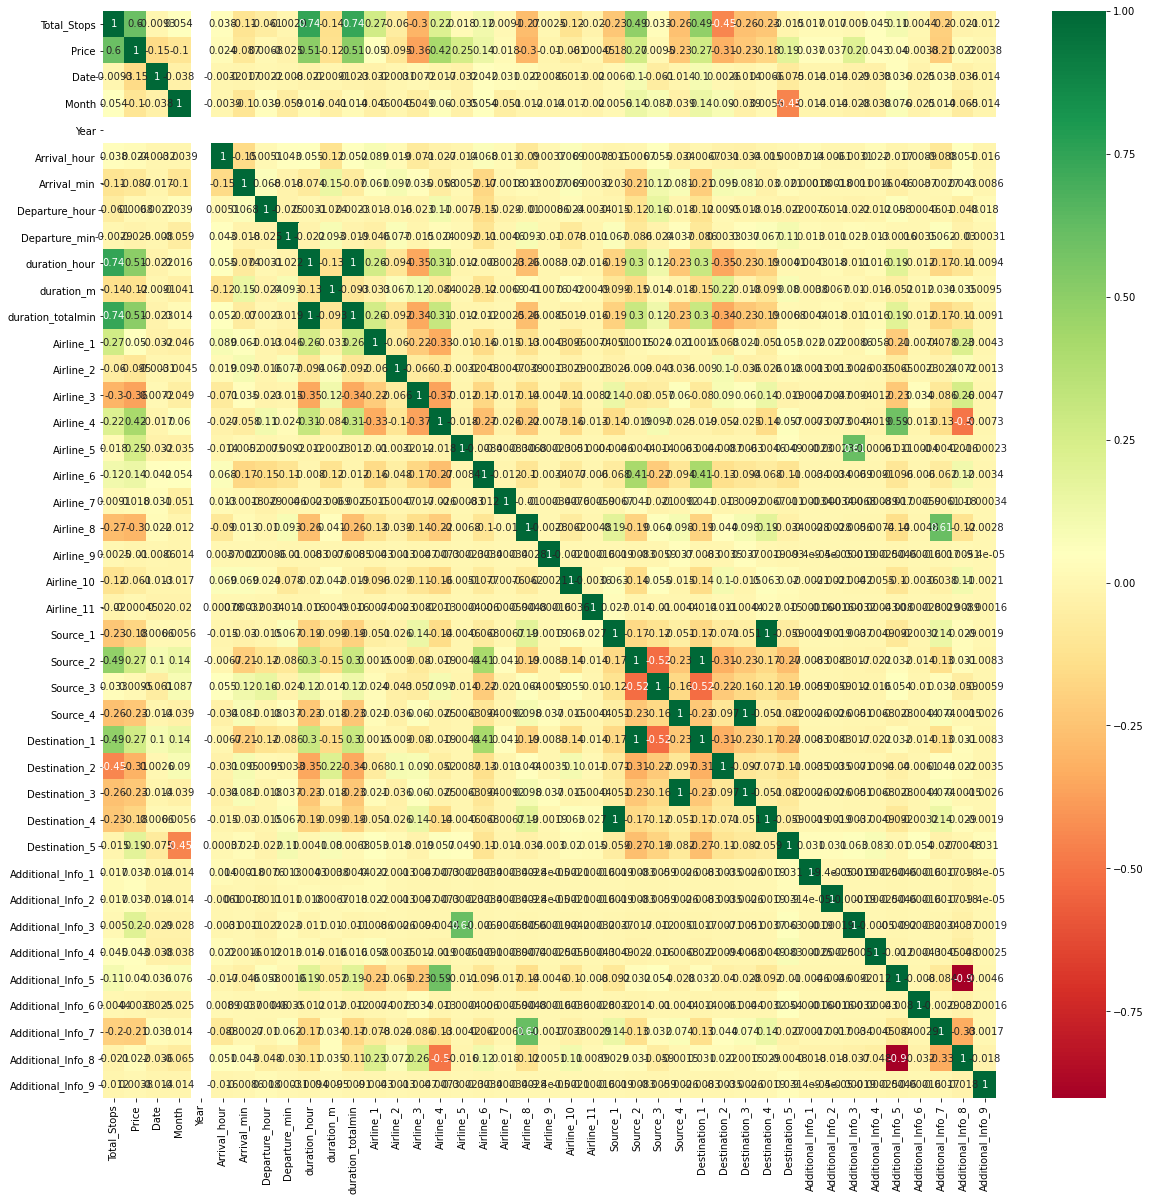

In [115]:
## Finding Correlation

plt.figure(figsize=(20,20))
sns.heatmap(finaldf_train.corr(),annot = True,cmap="RdYlGn")

In [116]:
#Important Feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(X, y)
 

ExtraTreesRegressor()

In [117]:
print(selection.feature_importances_)

[1.99853066e-01 9.79189014e-02 4.74046982e-02 0.00000000e+00
 2.12895439e-02 1.45229916e-02 1.92932496e-02 1.74490489e-02
 9.96457887e-02 1.28445514e-02 7.12478885e-02 7.59403635e-03
 1.89527932e-03 1.68931484e-02 1.24738509e-01 6.39458678e-02
 1.75948213e-02 7.80058556e-04 3.06802154e-03 7.45422233e-05
 4.50630111e-03 6.42339100e-05 4.99110101e-04 1.09259912e-02
 3.82082332e-03 3.89222766e-03 6.86103506e-03 7.53751398e-03
 4.39148734e-03 4.01649624e-04 3.11990529e-02 1.53998236e-04
 1.39559370e-04 1.23223109e-03 7.43587842e-04 7.88892909e-02
 3.27952492e-05 4.18662526e-05 6.60525273e-03 7.97898484e-06]


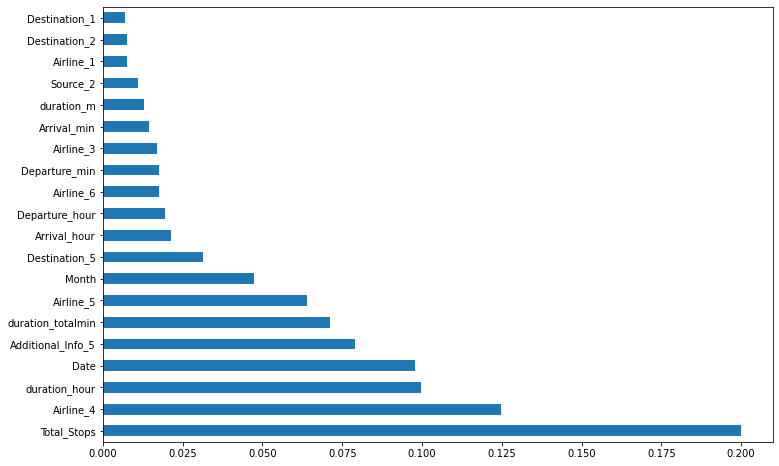

In [118]:
plt.figure(figsize=(12,8))
feat_imp=pd.Series(selection.feature_importances_,index=X.columns)
feat_imp.nlargest(20).plot(kind='barh')

In [119]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [120]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [122]:
y_pred = reg_rf.predict(X_test)

In [123]:
reg_rf.score(X_train,y_train)

0.9794772618406676

In [124]:
reg_rf.score(X_test,y_test)

0.9077546110252137

In [126]:
pip install xgboost

ERROR: Could not install packages due to an EnvironmentError: [SSL: DECRYPTION_FAILED_OR_BAD_RECORD_MAC] decryption failed or bad record mac (_ssl.c:2607)



In [127]:
#import xgboost as xgb
#from sklearn.metrics import mean_squared_error

In [130]:
#data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

In [131]:
#xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [132]:
#xg_reg.fit(X_train,y_train)


[00:28:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=8,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=10, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [133]:
#preds = xg_reg.predict(X_test)

In [134]:
#xg_reg.score(X_test,y_test)

0.06313085046685396

In [135]:
#rmse = np.sqrt(mean_squared_error(y_test, preds))
#print("RMSE: %f" % (rmse))

RMSE: 4544.668488


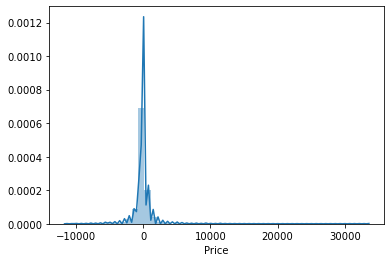

In [136]:
#sns.distplot(y_test-y_pred)

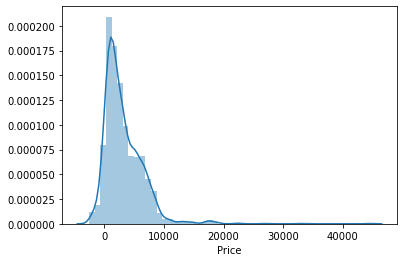

In [138]:
#sns.distplot(y_test-preds)

Text(0, 0.5, 'y_pred')

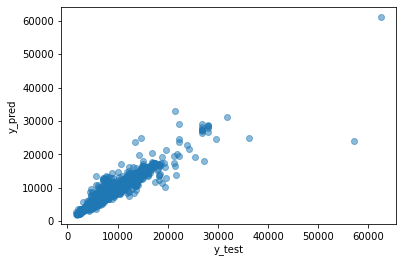

In [139]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')

Text(0, 0.5, 'xgbpreds')

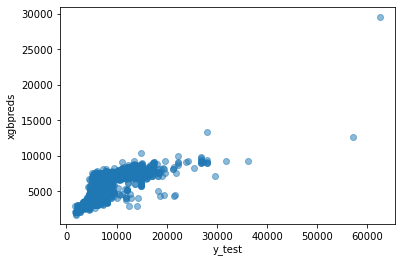

In [140]:
#plt.scatter(y_test,preds,alpha=0.5)
#plt.xlabel('y_test')
#plt.ylabel('xgbpreds')

In [142]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 625.6708136960834
MSE: 2033621.6013861836
RMSE: 1426.0510514656141


In [143]:
#print('MAE:', metrics.mean_absolute_error(y_test,preds))
#print('MSE:', metrics.mean_squared_error(y_test,preds))
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,preds)))

MAE: 3257.4579889533225
MSE: 20654011.667549826
RMSE: 4544.668488190291


In [144]:
metrics.r2_score(y_test,y_pred)

0.9077546110252137

In [145]:
#metrics.r2_score(y_test,preds)

0.06313085046685396

In [146]:
##HyperParameter Tuning

In [147]:
from sklearn.model_selection import RandomizedSearchCV

In [148]:
##RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=100 , stop=1200, num =12)]
max_features =['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [149]:
random_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

In [150]:
rf_random=RandomizedSearchCV(estimator =reg_rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [151]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  10.2s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.1s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  8.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [152]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [153]:
prediction=rf_random.predict(X_test)

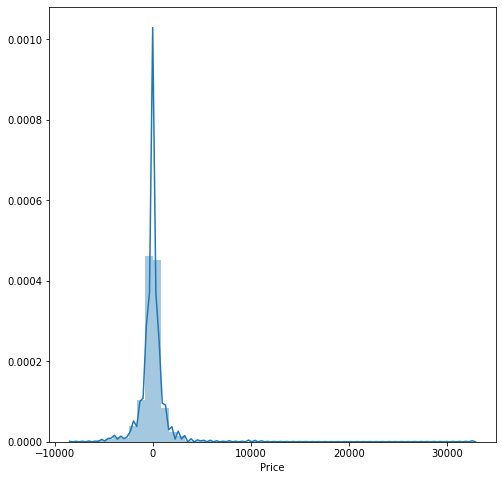

In [156]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-prediction)


In [162]:
import pickle
file=open('flight_rf.pk1','wb')
pickle.dump(rf_random,file)

In [163]:
model= open('flight_rf.pk1','rb')
forest=pickle.load(model)

In [164]:
y_prediction=forest.predict(X_test)

In [165]:
metrics.r2_score(y_test,y_prediction)

0.9060116589500977